In [448]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [449]:
data = load_boston()
X = np.array(data.data)
x = X[:,:3]
y = np.array(data.target)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [450]:
# x = []
# y = Y

# for i in range(0, len(X)):
#     x.append(X[i][1])
#     y.append(Y[i][1])

In [451]:
initial_m = np.random.randn(1)
initial_b = 1

In [452]:
def compute_error(m, b, x, y):
    totalError = 0
    lam = 0.001
    for i in range(0, len(x)):
        totalError += ((y[i] - (m * x[i] + b)) **2) + (lam/float(len(x)) * np.sum(m **2))
    
    totalError = totalError / float(len(x))
    return totalError

In [453]:
print("the initial error is" , compute_error(initial_m,initial_b,x,y))

the initial error is [538.81472996 485.47792583 504.15063612]


In [454]:
def linear_formula(x, m, b):
    return (m * x) + b

def gradient_step(x, y, m, b, learning_rate):
    gradient_m = 0
    gradient_b = 0
    N = float(len(x))   
    lam = 0.0001
    for i in range(0, len(x)):
        gradient_m += (-2/N) * x[i] * (y[i] - linear_formula(x[i], m, b))
        gradient_b += (-2/N) * (y[i] - linear_formula(x[i], m, b))
    
    m = m - learning_rate * (gradient_m + (lam/N * m))
    b = b - (learning_rate * gradient_b)
    
    return [m, b]

In [455]:
def gradient_descent(x, y, m, b, learning_rate, epochs):
#     m = current_m
#     b = current_b
    
    check_iter = 1000
    
    for i in range(epochs):
        m, b = gradient_step(x, y, m, b, learning_rate)
        
        if i % check_iter == 0:
            print("epoch[", i, "] - loss: ", compute_error(m, b, x, y))
        
    return [m, b]

def storeWeight():
    lm, lb = gradient_step(x, y, m, b, learning_rate)
    return [lm,lb]



# TRAINING

In [456]:
m, b = gradient_descent(X_train, y_train, initial_m, initial_b, learning_rate, epochs)
print("m: ", m, "b: ", b)

epoch[ 0 ] - loss:  [537.90337457 408.35223283 391.12842092]
epoch[ 1000 ] - loss:  [ 87.75674722  87.79963679 141.83219213]
epoch[ 2000 ] - loss:  [72.69324846 75.16568433 91.3515925 ]
epoch[ 3000 ] - loss:  [72.17437796 74.62946764 74.75746837]
epoch[ 4000 ] - loss:  [72.15650545 74.60670952 69.30260148]
epoch[ 5000 ] - loss:  [72.15589002 74.60574381 67.50946243]
epoch[ 6000 ] - loss:  [72.15586895 74.60570295 66.9200168 ]
epoch[ 7000 ] - loss:  [72.15586831 74.6057013  66.72625261]
epoch[ 8000 ] - loss:  [72.15586833 74.60570128 66.66255792]
epoch[ 9000 ] - loss:  [72.15586836 74.6057013  66.64162004]
m:  [-0.45544668  0.14007203 -0.64111988] b:  [24.23833544 20.88065824 29.60182192]


In [457]:
def cost(x,y,m,b):
    yError = 0
    for i in range(0, len(x)):
        yError += ((y[i] - (m * x[i] + b)) **2)
    yError = yError / float(len(x))
    return yError

# TRAIN COST

In [458]:
lm, lb = storeWeight()
testError = cost(X_train,y_train,lm,lb)
print(testError)

[72.15853826 74.61540064 66.63486798]


# VALIDATION COST

In [459]:
lm, lb = storeWeight()
valError = cost(X_val,y_val,lm,lb)
print(valError)

[71.17674062 68.8508124  56.90316327]


# TEST COST

In [460]:
lm, lb = storeWeight()
testError = cost(X_test,y_test,lm,lb)
print(testError)

[66.86932456 70.36293773 58.77257754]


In [480]:
pred_y = []

for i in range(0, len(X_train)):
    pred_y.append(linear_formula(X_train[i], m[2], b[2]))

In [481]:
pred_y = np.array(pred_y)

In [482]:
pred_y.shape

(404, 3)

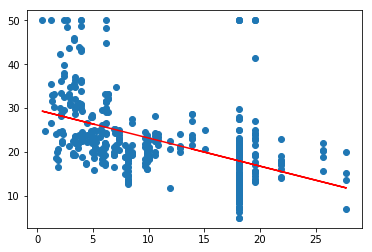

In [483]:
plt.scatter(X_train[:,2], y_train)
plt.plot(X_train[:,2],pred_y[:,2], 'r-')